In [12]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [13]:
np.random.seed(42)

In [14]:
n = 5
T = 20

In [36]:
num_train = int(0.20 * n * T)
num_valid = int(0.10 * n * T)
num_calib = int(0.35 * n * T)
num_test  = int(0.35 * n * T)

#### Example masks

In [37]:
mask_trans = np.repeat([1, 2, 3, 4], [num_train, num_valid, num_calib, num_test])

np.random.shuffle(mask_trans)
mask_trans = mask_trans.reshape((T, n)).T

In [38]:
mask_semi_ind_1 = np.repeat([1, 2, 3], [num_train, num_valid, num_calib])
mask_semi_ind_2 = np.repeat(4, num_test)

np.random.shuffle(mask_semi_ind_1)
mask_semi_ind = np.concatenate([mask_semi_ind_1, mask_semi_ind_2]).reshape((T, n)).T

In [49]:
num_train + num_valid 

64

In [50]:
num_calib + num_test

34

In [51]:
num_train = int((0.65*(2/3)) * n * T)
num_valid = int((0.65*(1/3)) * n * T) + 1
num_calib = int(0.175 * n * T)
num_test  = int(0.175 * n * T) + 1

mask_temp_trans_1 = np.repeat([1, 2], [num_train, num_valid])
mask_temp_trans_2 = np.repeat([3, 4], [num_calib, num_test])

np.random.shuffle(mask_temp_trans_1)
np.random.shuffle(mask_temp_trans_2)
mask_temp_trans = np.concatenate([mask_temp_trans_1, mask_temp_trans_2]).reshape((T, n)).T

#### Plot masks

Create discrete colormap.

In [52]:
cmap = colors.ListedColormap(['tab:red', 'tab:blue', 'tab:orange', 'tab:green'])
bounds = [0.5, 1.5, 2.5, 3.5, 4.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

Create legend.

In [53]:
fig = plt.figure()
handles = [plt.scatter([],[], color=cmap.colors[0], marker='s', s=16, label='Training'),
           plt.scatter([],[], color=cmap.colors[1], marker='s', s=16, label='Validation'),
           plt.scatter([],[], color=cmap.colors[2], marker='s', s=16, label='Calibration'),
           plt.scatter([],[], color=cmap.colors[3], marker='s', s=16, label='Test')]
plt.close()

In [54]:
save_plots = True

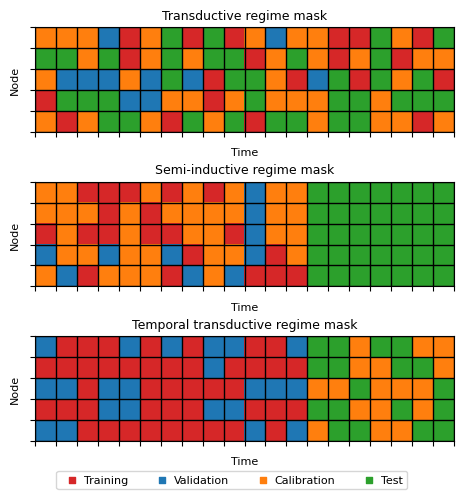

In [55]:
fig, axs = plt.subplots(3, 1, figsize=(5.4, 5.4))

axs[0].imshow(mask_trans, cmap=cmap, norm=norm)
axs[1].imshow(mask_semi_ind, cmap=cmap, norm=norm)
axs[2].imshow(mask_temp_trans, cmap=cmap, norm=norm)

for t in range(3):
    axs[t].grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    axs[t].set_xticks(np.arange(-0.5, T, 1)); axs[t].set_yticks(np.arange(-0.5, n, 1))
    axs[t].set_xticklabels([]); axs[t].set_yticklabels([])
    axs[t].set_xlabel('Time', fontsize=8)
    axs[t].set_ylabel('Node', fontsize=8)

axs[0].set_title('Transductive regime mask', fontsize=9)
axs[1].set_title('Semi-inductive regime mask', fontsize=9)
axs[2].set_title('Temporal transductive regime mask', fontsize=9)

fig.legend(handles=handles, loc='lower center', ncol=4, fancybox=True, fontsize=8, handletextpad=0.1)
plt.subplots_adjust(bottom = 0.07)

plt.show

if save_plots:
    fig.savefig('Mask_Visualisation.pdf', bbox_inches="tight")